
# EDA — College Scorecard (Most-Recent-Cohorts-Scorecard-Elements)

Exploratory Data Analysis (EDA) para el archivo más reciente del College Scorecard. Incluye:
1. Setup
2. Carga de datos
3. Resumen rápido (shape, dtypes, memoria, preview)
4. Valores faltantes y calidad de datos
5. Estadísticos descriptivos (numéricos y categóricos)
6. Exploración visual (histogramas, dispersión, correlación)
7. Cortes geográficos (por estado)
8. Resultados vs. insumos (matrícula/deuda vs. ingresos/repago)
9. Data dictionary (descarga y merge opcional del diccionario oficial)
10. Exportables (subset ligero y resúmenes)


In [1]:

# 1) Setup
import warnings, json, math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 100)

DATASET_PATH = r"data/Most-Recent-Cohorts-Scorecard-Elements.csv"


## 2) Carga de datos

In [2]:

df = pd.read_csv(DATASET_PATH, low_memory=False)
print("Shape:", df.shape)
df.head(3)


Shape: (7703, 123)


,index,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,INSTURL,NPCURL,HCM2,PREDDEG,CONTROL,LOCALE,HBCU,PBI,ANNHI,TRIBAL,AANAPII,HSI,NANTI,MENONLY,WOMENONLY,RELAFFIL,SATVR25,SATVR75,SATMT25,SATMT75,SATWR25,SATWR75,SATVRMID,SATMTMID,SATWRMID,ACTCM25,ACTCM75,ACTEN25,ACTEN75,ACTMT25,ACTMT75,ACTWR25,ACTWR75,ACTCMMID,ACTENMID,ACTMTMID,ACTWRMID,SAT_AVG,SAT_AVG_ALL,PCIP01,PCIP03,PCIP04,PCIP05,PCIP09,PCIP10,PCIP11,PCIP12,PCIP13,PCIP14,PCIP15,PCIP16,PCIP19,PCIP22,PCIP23,PCIP24,PCIP25,PCIP26,PCIP27,PCIP29,PCIP30,PCIP31,PCIP38,PCIP39,PCIP40,PCIP41,PCIP42,PCIP43,PCIP44,PCIP45,PCIP46,PCIP47,PCIP48,PCIP49,PCIP50,PCIP51,PCIP52,PCIP54,DISTANCEONLY,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,NPT4_PUB,NPT4_PRIV,NPT41_PUB,NPT42_PUB,NPT43_PUB,NPT44_PUB,NPT45_PUB,NPT41_PRIV,NPT42_PRIV,NPT43_PRIV,NPT44_PRIV,NPT45_PRIV,PCTPELL,RET_FT4,RET_FTL4,RET_PT4,RET_PTL4,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GT_25K_P6,GRAD_DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,RPY_3YR_RT_SUPP,C150_L4_POOLED_SUPP,C150_4_POOLED_SUPP
0,0,100654,100200,1002,Alabama A & M University,Normal,AL,www.aamu.edu/,galileo.aamu.edu/netpricecalculator/npcalc.htm,0,3,1,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,377.0,470.0,370.0,470.0,370.0,470.0,424.0,420.0,420.0,15.0,19.0,14.0,19.0,15.0,18.0,NaN,NaN,17.0,17.0,17.0,NaN,827.0,827.0,0.0424,0.0191,0.0169,0.0000,0.0000,0.0487,0.0275,0.0,0.1123,0.1081,0.0339,0.0000,0.0254,0.0,0.0127,0.0424,0.0,0.0975,0.0169,0.0,0.0,0.0,0.0000,0.00,0.0127,0.0,0.0487,0.0085,0.0572,0.0424,0.0,0.0,0.0,0.0,0.0297,0.0000,0.1970,0.0000,0.0,4206.0,0.0333,0.9353,0.0055,0.0019,0.0024,0.0019,0.0000,0.0059,0.0138,0.0656,1,15229.0,NaN,14601.0,14882.0,17479.0,18397.0,19727.0,NaN,NaN,NaN,NaN,NaN,0.7356,0.6595,NaN,0.3333,NaN,0.8284,0.1049,30300,0.426,33888,347.789507913825,0.2370456303,NaN,0.32451962616822
1,1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,www.uab.edu,www.collegeportraits.org/AL/UAB/estimator/agree,0,3,1,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,500.0,640.0,490.0,640.0,NaN,NaN,570.0,565.0,NaN,21.0,27.0,21.0,29.0,19.0,26.0,NaN,NaN,24.0,25.0,23.0,NaN,1107.0,1107.0,0.0000,0.0000,0.0000,0.0024,0.0485,0.0000,0.0150,0.0,0.0882,0.0577,0.0000,0.0111,0.0000,0.0,0.0223,0.0179,0.0,0.0746,0.0102,0.0,0.0,0.0,0.0053,0.00,0.0204,0.0,0.0780,0.0320,0.0228,0.0524,0.0,0.0,0.0,0.0,0.0305,0.2084,0.1837,0.0184,0.0,11383.0,0.5922,0.2600,0.0283,0.0518,0.0022,0.0007,0.0368,0.0179,0.0100,0.2607,1,14789.0,NaN,12453.0,13703.0,16137.0,17274.0,16912.0,NaN,NaN,NaN,NaN,NaN,0.3460,0.8288,NaN,0.5750,NaN,0.5214,0.2422,39700,0.665,21941.5,225.183648722001,0.5006735519,NaN,0.54610480182926
2,2,100690,2503400,25034,Amridge University,Montgomery,AL,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,0,3,2,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.2353,0.0,0.0000,0.0588,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.25,0.0000,0.0,0.0000,0.0294,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.4265,0.0000,1.0,291.0,0.2990,0.4192,0.0069,0.0034,0.0000,0.0000,0.0000,0.0000,0.2715,0.4536,1,NaN,12992.0,NaN,NaN,NaN,NaN,NaN,12992.0,NaN,NaN,NaN,NaN,0.6801,0.0000,NaN,0.6667,NaN,0.7795,0.8540,40100,0.676,23370,239.844216240146,0.2904884319,NaN,PrivacySuppressed


## 3) Resumen rápido

In [3]:

info = pd.DataFrame({
    "column": df.columns,
    "dtype": df.dtypes.astype(str),
    "non_null": df.notna().sum().values,
    "nulls": df.isna().sum().values,
    "pct_null": (df.isna().sum().values / len(df) * 100).round(2)
}).sort_values("column").reset_index(drop=True)
info


,column,dtype,non_null,nulls,pct_null
0,AANAPII,float64,7282,421,5.47
1,ACTCM25,float64,1257,6446,83.68
2,ACTCM75,float64,1257,6446,83.68
3,ACTCMMID,float64,1257,6446,83.68
4,ACTEN25,float64,1108,6595,85.62
...,...,...,...,...,...
118,UGDS_UNKN,float64,6990,713,9.26
119,UGDS_WHITE,float64,6990,713,9.26
120,UNITID,int64,7703,0,0.00
121,WOMENONLY,float64,7282,421,5.47


In [4]:

mem_mb = df.memory_usage(deep=True).sum() / (1024**2)
print(f"Estimated memory usage: {mem_mb:.2f} MB")


Estimated memory usage: 11.78 MB


## 4) Valores faltantes y calidad de datos

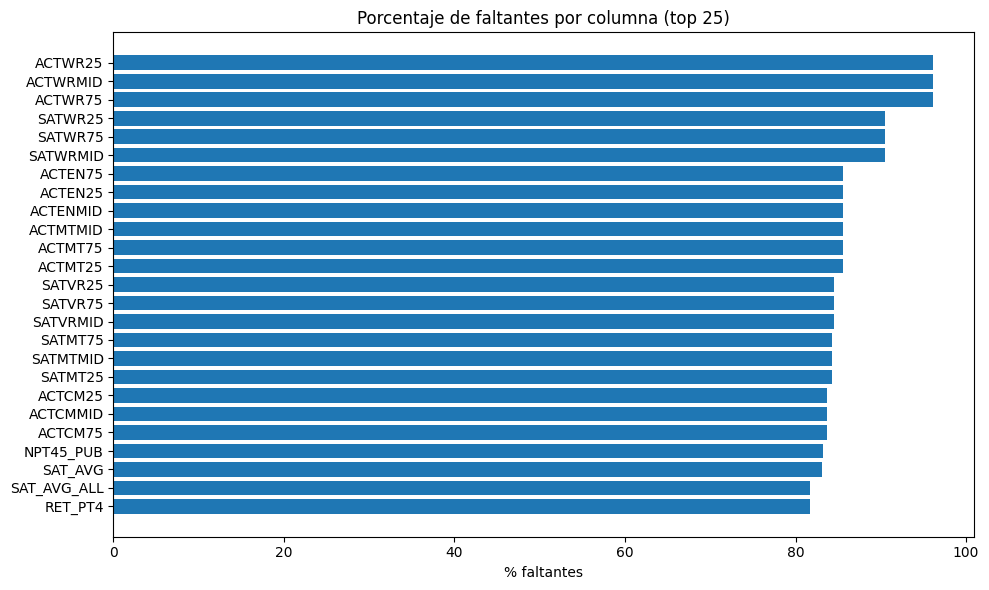

In [ ]:

top_missing = info.sort_values("pct_null", ascending=False).head(25)
plt.figure(figsize=(10,6))
plt.barh(top_missing["column"], top_missing["pct_null"])
plt.gca().invert_yaxis()
plt.title("Porcentaje de faltantes por columna (top 25)")
plt.xlabel("% faltantes")
plt.tight_layout()
plt.show()


## 5) Estadísticos descriptivos

In [6]:

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = [c for c in df.columns if c not in numeric_cols]

print("Numéricas:", len(numeric_cols))
print("Categóricas:", len(categorical_cols))
df[numeric_cols].describe().T.round(3)


Numéricas: 111
Categóricas: 12


,count,mean,std,min,25%,50%,75%,max
index,7703.0,3851.000,2223.809,0.0,1925.500,3851.000,5776.500,7702.0
UNITID,7703.0,1663052.283,6566909.564,100654.0,174242.000,230472.000,447652.000,48414501.0
OPEID,7703.0,1891629.680,3383134.346,100200.0,344050.000,1054211.000,2811950.000,82098821.0
OPEID6,7703.0,16293.907,13883.578,1002.0,3436.500,10490.000,25988.000,42371.0
HCM2,7703.0,0.031,0.172,0.0,0.000,0.000,0.000,1.0
...,...,...,...,...,...,...,...,...
RET_FTL4,3843.0,0.686,0.180,0.0,0.568,0.691,0.816,1.0
RET_PT4,1412.0,0.456,0.293,0.0,0.250,0.450,0.636,1.0
RET_PTL4,2208.0,0.565,0.264,0.0,0.383,0.503,0.790,1.0
PCTFLOAN,6966.0,0.523,0.284,0.0,0.333,0.585,0.747,1.0


In [7]:

for c in ["STABBR", "CONTROL", "PREDDEG", "LOCALE"]:
    if c in df.columns:
        print(f"\nValue counts — {c}")
        print(df[c].value_counts(dropna=False).head(20))



Value counts — STABBR
STABBR
CA    795
TX    485
NY    467
FL    446
PA    405
OH    355
IL    305
NC    210
MI    209
MO    200
MA    200
VA    190
TN    186
GA    186
NJ    165
IN    162
MN    157
PR    151
OK    150
AZ    134
Name: count, dtype: int64

Value counts — CONTROL
CONTROL
3    3703
1    2044
2    1956
Name: count, dtype: int64

Value counts — PREDDEG
PREDDEG
1    3343
3    2102
2    1523
0     443
4     292
Name: count, dtype: int64

Value counts — LOCALE
LOCALE
 21.0    1938
 11.0    1657
 13.0     984
 12.0     868
 32.0     454
 NaN      421
 41.0     381
 33.0     340
 22.0     213
 23.0     140
 31.0     123
 42.0     119
 43.0      62
-3.0        3
Name: count, dtype: int64


## 6) Exploración visual

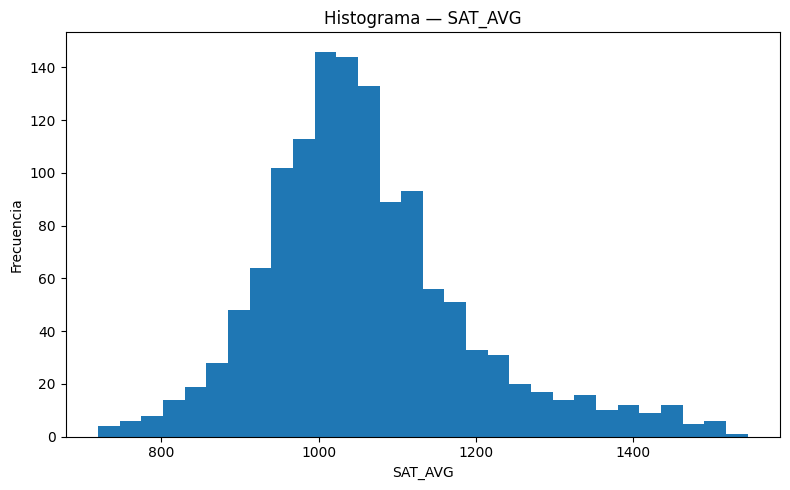

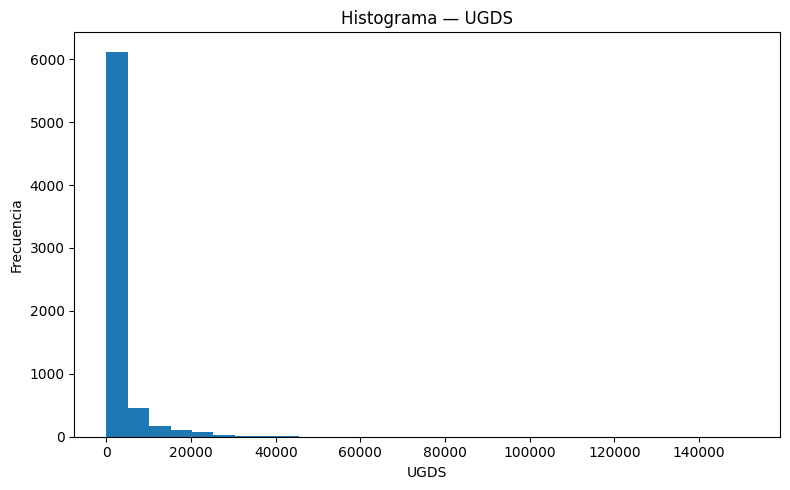

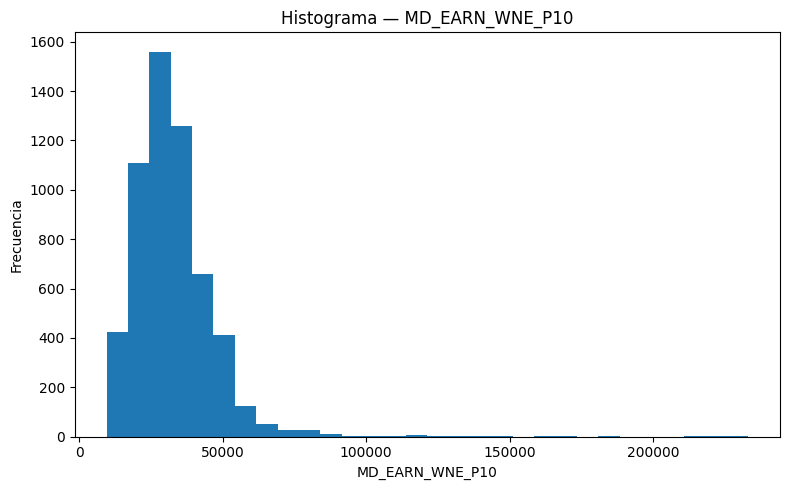

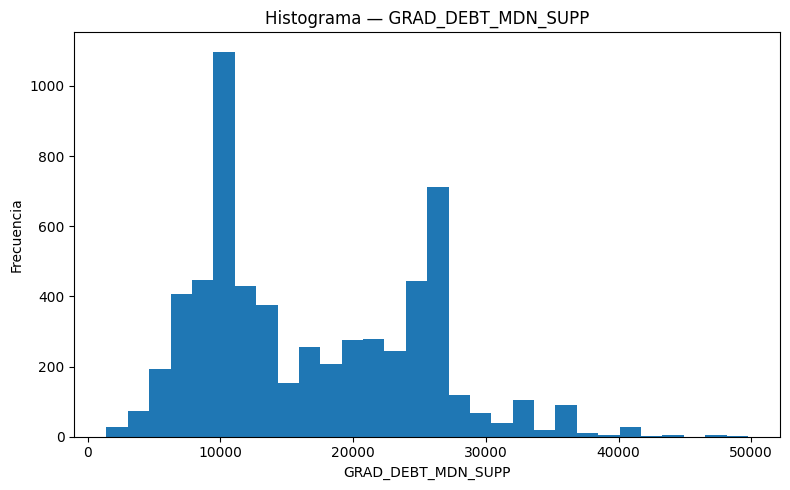

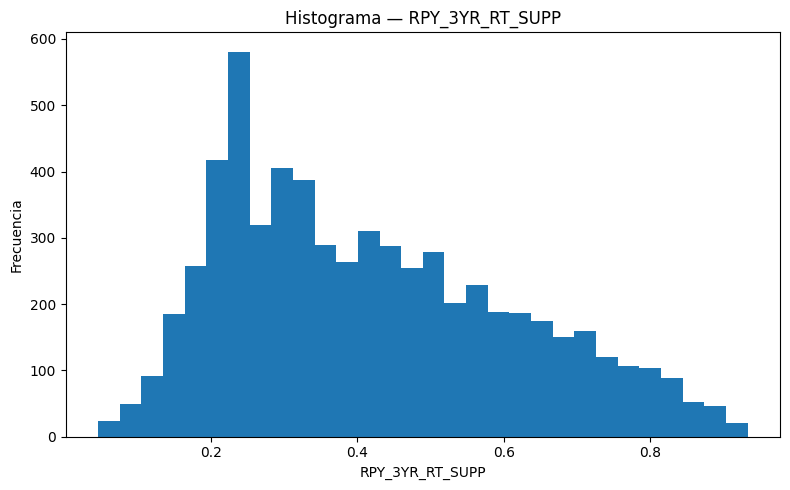

In [8]:

def histcol(col, bins=30):
    if col in df.columns:
        s = pd.to_numeric(df[col], errors="coerce").dropna()
        if len(s) == 0:
            print(f"No hay datos numéricos para {col}")
            return
        plt.figure(figsize=(8,5))
        plt.hist(s, bins=bins)
        plt.title(f"Histograma — {col}")
        plt.xlabel(col)
        plt.ylabel("Frecuencia")
        plt.tight_layout()
        plt.show()

for col in ["ADM_RATE","SAT_AVG","TUITIONFEE_IN","TUITIONFEE_OUT","UGDS",
            "MD_EARN_WNE_P10","GRAD_DEBT_MDN_SUPP","RPY_3YR_RT_SUPP"]:
    histcol(col)


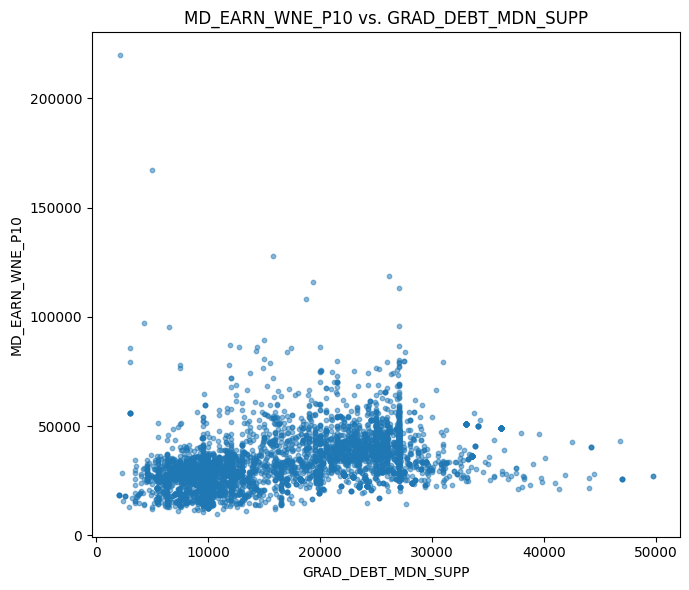

In [9]:

pairs = [
    ("ADM_RATE", "SAT_AVG"),
    ("TUITIONFEE_IN", "MD_EARN_WNE_P10"),
    ("GRAD_DEBT_MDN_SUPP", "MD_EARN_WNE_P10"),
    ("TUITIONFEE_IN", "RPY_3YR_RT_SUPP"),
]

for x, y in pairs:
    if x in df.columns and y in df.columns:
        xnum = pd.to_numeric(df[x], errors="coerce")
        ynum = pd.to_numeric(df[y], errors="coerce")
        mask = xnum.notna() & ynum.notna()
        if mask.sum() > 5:
            plt.figure(figsize=(7,6))
            plt.scatter(xnum[mask], ynum[mask], s=10, alpha=0.5)
            plt.xlabel(x); plt.ylabel(y); plt.title(f"{y} vs. {x}")
            plt.tight_layout(); plt.show()


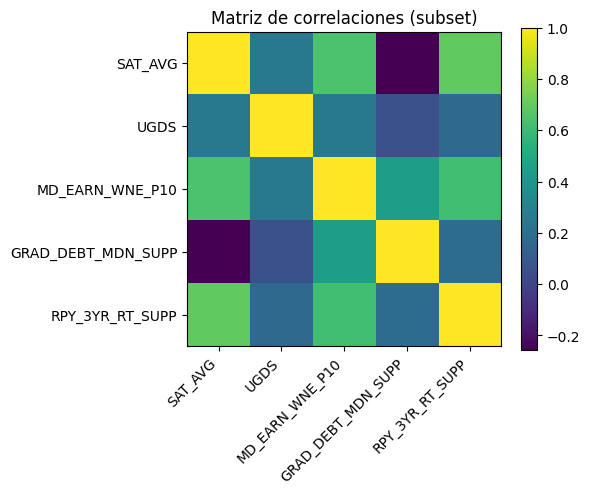

In [10]:

subset = [c for c in ["ADM_RATE","SAT_AVG","UGDS","TUITIONFEE_IN","TUITIONFEE_OUT",
                      "MD_EARN_WNE_P10","GRAD_DEBT_MDN_SUPP","RPY_3YR_RT_SUPP"]
          if c in df.columns]
if len(subset) >= 2:
    corr = df[subset].apply(pd.to_numeric, errors="coerce").corr()
    plt.figure(figsize=(6,5))
    plt.imshow(corr, cmap=None)
    plt.xticks(range(len(subset)), subset, rotation=45, ha="right")
    plt.yticks(range(len(subset)), subset)
    plt.title("Matriz de correlaciones (subset)")
    plt.colorbar(); plt.tight_layout(); plt.show()
    corr.round(3)


## 7) Cortes geográficos y por control

In [11]:

if "STABBR" in df.columns and "TUITIONFEE_IN" in df.columns:
    tmp = df.copy()
    tmp["TUITIONFEE_IN"] = pd.to_numeric(tmp["TUITIONFEE_IN"], errors="coerce")
    state_tuition = tmp.groupby("STABBR", dropna=False)["TUITIONFEE_IN"].mean().sort_values(ascending=False)
    print(state_tuition.round(0).head(15))

    plt.figure(figsize=(10,6))
    state_tuition.head(20).plot(kind="bar")
    plt.title("Matrícula in-state promedio por estado (top 20)")
    plt.ylabel("USD"); plt.tight_layout(); plt.show()

if "STABBR" in df.columns and "CONTROL" in df.columns:
    counts = df.groupby(["STABBR","CONTROL"]).size().unstack(fill_value=0)
    counts.head(10)


## 8) Resultados vs. insumos

In [12]:

cols_needed = {"TUITIONFEE_IN":"tuition_in", "MD_EARN_WNE_P10":"earn_p10", "UGDS":"enroll"}
present = {k:v for k,v in cols_needed.items() if k in df.columns}
if len(present) >= 2:
    tmp = df.copy()
    for c,newc in present.items():
        tmp[newc] = pd.to_numeric(tmp[c], errors="coerce")
    tmp = tmp.dropna(subset=list(present.values()))
    if {"tuition_in","earn_p10"}.issubset(tmp.columns):
        plt.figure(figsize=(8,6))
        sizes = (tmp["enroll"].fillna(0)/tmp["enroll"].fillna(0).max()*100 + 10) if "enroll" in tmp else 20
        plt.scatter(tmp["tuition_in"], tmp["earn_p10"], s=sizes, alpha=0.4)
        plt.xlabel("In-state tuition (USD)"); plt.ylabel("Median earnings (10y)")
        plt.title("Earnings vs. tuition")
        plt.tight_layout(); plt.show()


## 9) Data dictionary (opcional)

In [13]:

DICT_URL = "https://collegescorecard.ed.gov/assets/CollegeScorecardDataDictionary.xlsx"
try:
    import requests, io
    r = requests.get(DICT_URL, timeout=30); r.raise_for_status()
    bio = io.BytesIO(r.content)
    xls = pd.ExcelFile(bio)
    possible = [s for s in xls.sheet_names if "Institution" in s or "Data_Dictionary" in s or "Institution_Data_Dictionary" in s]
    if not possible: possible = xls.sheet_names[:1]
    dict_df = pd.read_excel(xls, sheet_name=possible[0])
    dict_df.columns = [str(c).strip().upper() for c in dict_df.columns]
    name_col = [c for c in dict_df.columns if "VARIABLE" in c and "NAME" in c] or [c for c in dict_df.columns if c in {"VARIABLE NAME","VARIABLE","NAME"}]
    name_col = name_col[0] if name_col else dict_df.columns[0]
    desc_cols = [c for c in dict_df.columns if "DEFINITION" in c or "DESCRIPTION" in c or "NAME" in c]
    desc_cols = list(dict.fromkeys([name_col] + desc_cols))
    dict_df = dict_df[desc_cols].copy()
    dict_df[name_col] = dict_df[name_col].astype(str).str.strip()
    mapping = dict(zip(dict_df[name_col], dict_df.drop(columns=[name_col]).apply(lambda r: " | ".join([f"{k}: {str(v)}" for k,v in r.items() if pd.notna(v)]), axis=1)))
    my_cols = pd.Series(df.columns, name="column").to_frame()
    my_cols["definition"] = my_cols["column"].map(mapping)
    my_cols.to_csv("data_dictionary_from_official.csv", index=False)
    print("Guardado: data_dictionary_from_official.csv")
    my_cols.head(25)
except Exception as e:
    print("No se pudo descargar/parsear el diccionario:", e)
    print("Coloca el Excel junto al notebook y re-ejecuta esta celda si es necesario.")


No se pudo descargar/parsear el diccionario: No module named 'requests'
Coloca el Excel junto al notebook y re-ejecuta esta celda si es necesario.


## 10) Exportables

In [14]:

keep = [c for c in ["UNITID","INSTNM","CITY","STABBR","PREDDEG","CONTROL","LOCALE",
                    "ADM_RATE","SAT_AVG","UGDS","TUITIONFEE_IN","TUITIONFEE_OUT",
                    "PCTPELL","PCTFLOAN","RET_FT4","RET_FTL4","RET_PT4","RET_PTL4",
                    "C150_4_POOLED_SUPP","C150_L4_POOLED_SUPP",
                    "MD_EARN_WNE_P10","GT_25K_P6","GRAD_DEBT_MDN_SUPP","RPY_3YR_RT_SUPP"]
        if c in df.columns]
if keep:
    light = df[keep].copy()
    light.to_csv("scorecard_light_subset.csv", index=False)
    print("Guardado: scorecard_light_subset.csv")
else:
    print("No se encontraron columnas del keep-list; omitiendo export.")


Guardado: scorecard_light_subset.csv
